In [1]:
# -*- coding: utf-8 -*-
# %%python3

# Descrição do Projeto

O objetivo do projeto é identificar padrões nas informações disponíveis, compreender as preferências dos passageiros e analisar o impacto de fatores externos nas corridas. Para alcançar isso, utilizaremos um banco de dados, faremos análises dos dados dos concorrentes e testaremos uma hipótese relacionada ao efeito do clima na frequência das viagens.

Com essas informações em mãos, será possível fornecer visibilidade à empresa, permitindo a criação de propagandas de marketing mais eficazes e direcionadas para o negócio.

A seguir, apresentamos os dados disponíveis para realizar este estudo. Essa etapa é de extrema importância, pois envolve a compreensão da base de dados, correções, enriquecimento de dados e aplicação de normalizações e transformações que contribuirão para facilitar e tornar mais precisa a análise do negócio.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [4]:
try:
    df_1 = pd.read_csv('/datasets/Projeto 6/moved_project_sql_result_01.csv')
    df_4 = pd.read_csv('/datasets/Projeto 6/moved_project_sql_result_04.csv')
    df_7 = pd.read_csv('/datasets/Projeto 6/moved_project_sql_result_07.csv')
except:
    df_1 = pd.read_csv('moved_project_sql_result_01.csv')
    df_4 = pd.read_csv('moved_project_sql_result_04.csv')
    df_7 = pd.read_csv('moved_project_sql_result_07.csv')

contém os seguintes dados:
trips_amount: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.

tabela empresas taxi: dados sobre as empresas de taxi
- company_name: nome da empresa
- trips_amount: quantidade de viagens


# ANALISANDO DADOS

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df_1.head(10)

In [ ]:
df_1.describe()

In [4]:
df_1['company_name'].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasin',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Associat', 'Checker Taxi Affiliation',
       'Blue Diamond', 'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha ride inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada',
       '6

In [5]:
df_1.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [6]:
df_1.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Length: 64, dtype: bool

Após a leitura dos dados iniciais, foi observado que o dataframe não possui valores ausentes. Além disso, os tipos de dados estão corretamente formatados para a realização das análises. Ao utilizar a função describe(), foi possível verificar as estatísticas descritivas do dataframe.

Uma observação importante é que o dataframe apresenta um desvio padrão alto em geral. Essa informação pode ser percebida ao analisar a média e a mediana dos dados. Essa variação é esperada, uma vez que o estudo está relacionado ao tempo de viagens, que podem variar desde trajetos curtos até trajetos longos.

Portanto, o comportamento do dataframe em relação ao desvio padrão elevado é coerente com a natureza das viagens, que abrangem diferentes durações, incluindo trajetos curtos, médios e longos.

# ANÁLISE EXPLORATÓRIA DE DADOS 

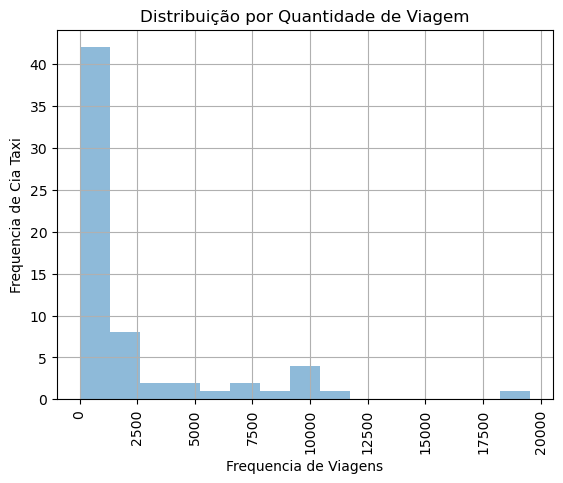

In [7]:
df_1['trips_amount'].hist(bins=15, alpha=0.5)

plt.xticks(rotation=90);
plt.title('Distribuição por Quantidade de Viagem');
plt.ylabel('Frequencia de Cia Taxi');
plt.xlabel('Frequencia de Viagens');

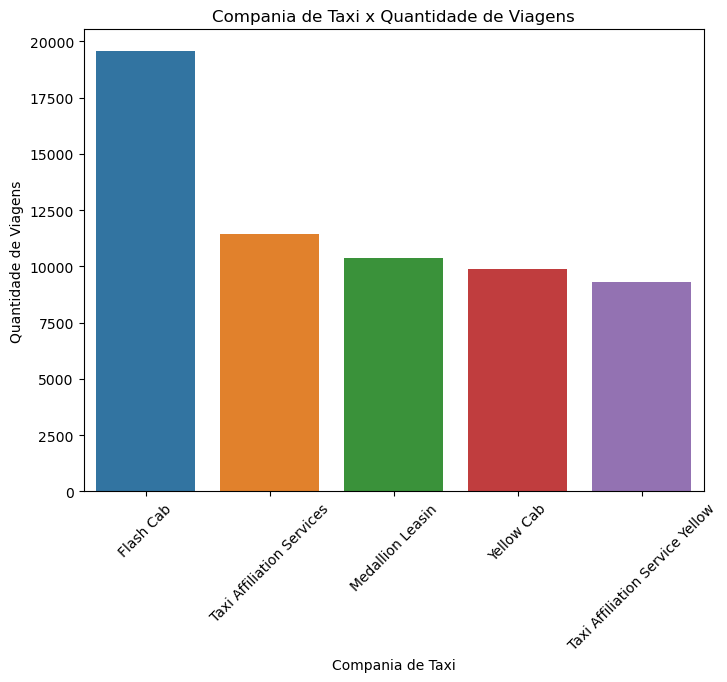

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_1['company_name'].head(), y=df_1['trips_amount'].head());
plt.xticks(rotation= 45)
plt.xlabel('Compania de Taxi')
plt.ylabel('Quantidade de Viagens')
plt.title('Compania de Taxi x Quantidade de Viagens');

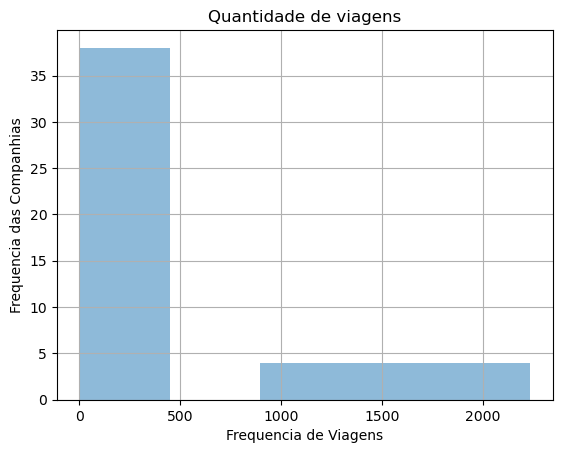

In [14]:
df_1.query('trips_amount > 0 & trips_amount <= 2500').hist(bins=5,alpha=0.5);
plt.title('Quantidade de viagens');
plt.xlabel('Frequencia de Viagens');
plt.ylabel('Frequencia das Companhias');

Durante a análise dos dados, observamos que existe um grande número de empresas de táxi que registram um volume baixo de viagens, especialmente na faixa de 0 a 500.

Contém os seguintes dados:
- dropoff_location_name: bairros de Chicago onde as corridas terminaram
- average_trips: o número médio de viagens que terminaram em cada bairro em novembro de 2017.

# ANALISANDO DADOS

In [20]:
# Analisando o segundo arquivo df_4
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [21]:
df_4.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [22]:
df_4.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [38]:
df_4['dropoff_location_name'].unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

Ao realizar a leitura da base de dados verificamos a quantidade de dados em cada coluna e não possuem dados ausentes, enquanto ao seu tipo de dados, estão corretos não irão precisar de maiores alterações, dentro da função describe (), temos um desvio padrão alto entre a média relacionada ao tempo de viagens.

# ANÁLISE EXPLORATÓRIA DE DADOS 

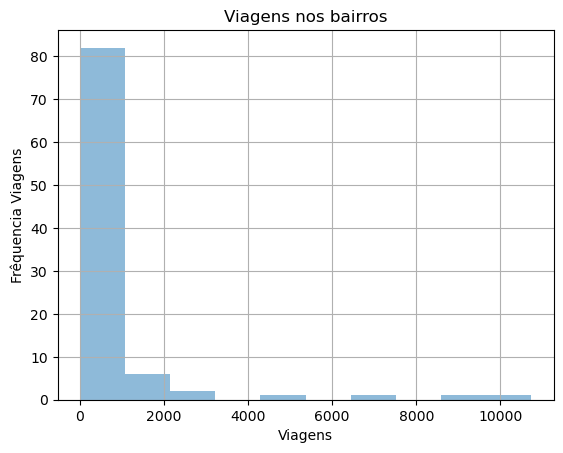

In [28]:
df_4['average_trips'].hist(bins=10, alpha=0.5)
plt.title('Viagens nos bairros');
plt.xlabel('Viagens');
plt.ylabel('Frêquencia Viagens');

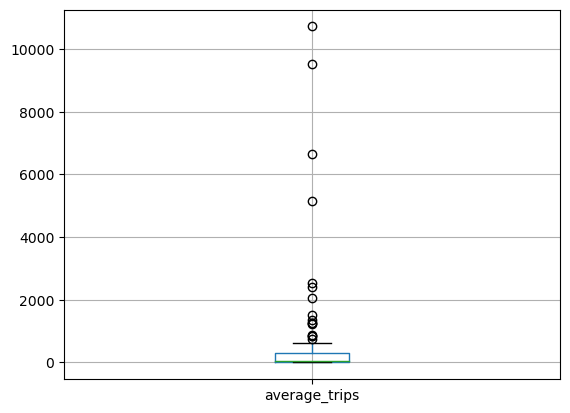

In [29]:
df_4[['average_trips']].boxplot();

Text(0, 0.5, '10 Bairros de Chicago')

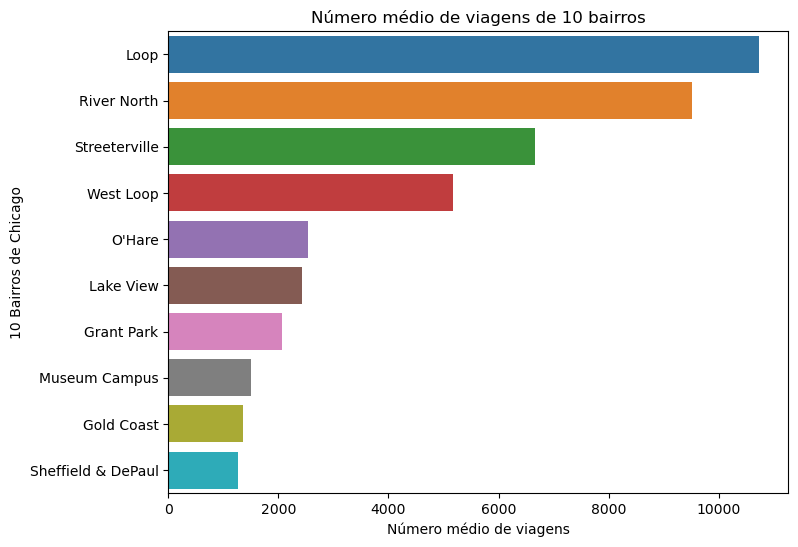

In [60]:
plt.figure(figsize=(8, 6))
sns.barplot(x = df_4['average_trips'].head(10), y = df_4['dropoff_location_name'].head(10))
plt.title('Número médio de viagens de 10 bairros');
plt.xlabel('Número médio de viagens');
plt.ylabel('10 Bairros de Chicago')

# TESTANDO HIPÓTESES

In [61]:
# Analisando o segundo arquivo df_4
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [67]:
df_7.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [66]:
df_7['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [70]:
# Mudando as variáveis e verificando se a mudança ocorreu corretamente
df_7['start_ts'] = pd.to_datetime(df_7['start_ts'])
df_7['duration_seconds'] = df_7['duration_seconds'].astype(int)
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 21.0+ KB


In [72]:
def cond_tempo(condicao):  
    if condicao == 'Good':
        return 1
    if condicao == 'Bad':
        return 0

In [73]:
df_7['number_condicao_tempo'] = df_7['weather_conditions'].apply(cond_tempo)

In [74]:
df_7.head(10)

,start_ts,weather_conditions,duration_seconds,number_condicao_tempo
0,2017-11-25 16:00:00,Good,2410,1
1,2017-11-25 14:00:00,Good,1920,1
2,2017-11-25 12:00:00,Good,1543,1
3,2017-11-04 10:00:00,Good,2512,1
4,2017-11-11 07:00:00,Good,1440,1
5,2017-11-11 04:00:00,Good,1320,1
6,2017-11-04 16:00:00,Bad,2969,0
7,2017-11-18 11:00:00,Good,2280,1
8,2017-11-11 14:00:00,Good,2460,1
9,2017-11-11 12:00:00,Good,2040,1


- start_ts
data e hora de coleta
- weather_conditions
condições meteorológicas no momento em que a corrida começou
- duration_seconds
duração da corrida em segundos


In [88]:
# Criando colunas para segmentar dias
df_7['dia'] = df_7['start_ts'].dt.day
df_7['hour'] = df_7['start_ts'].dt.hour
df_7['dia_da_semana'] = df_7['start_ts'].dt.weekday

In [89]:
# criando coluna minutos
minutos = 86400
df_7['duration_minutos'] = round((df_7['duration_seconds'] / minutos) * 1000, 2)

In [90]:
minutos = 60
df_7['duration_horas'] = round((df_7['duration_minutos'] / minutos), 2)

In [91]:
df_7.head(10)

,start_ts,weather_conditions,duration_seconds,number_condicao_tempo,dia,hour,dia_da_semana,duration_minutos,duration_horas
0,2017-11-25 16:00:00,Good,2410,1,25,16,5,27.89,0.46
1,2017-11-25 14:00:00,Good,1920,1,25,14,5,22.22,0.37
2,2017-11-25 12:00:00,Good,1543,1,25,12,5,17.86,0.30
3,2017-11-04 10:00:00,Good,2512,1,4,10,5,29.07,0.48
4,2017-11-11 07:00:00,Good,1440,1,11,7,5,16.67,0.28
5,2017-11-11 04:00:00,Good,1320,1,11,4,5,15.28,0.25
6,2017-11-04 16:00:00,Bad,2969,0,4,16,5,34.36,0.57
7,2017-11-18 11:00:00,Good,2280,1,18,11,5,26.39,0.44
8,2017-11-11 14:00:00,Good,2460,1,11,14,5,28.47,0.47
9,2017-11-11 12:00:00,Good,2040,1,11,12,5,23.61,0.39


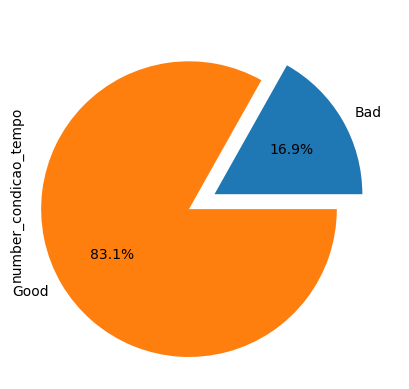

In [100]:
df_7.groupby('weather_conditions')['number_condicao_tempo'].count().plot(kind='pie', autopct="%0.1f%%", explode=(0, 0.2));

In [102]:
media_viagens = df_7.groupby('dia')['duration_minutos'].mean().reset_index()
media_viagens

,dia,duration_minutos
0,4,27.550763
1,11,20.620540
2,18,25.846389
3,25,21.693263


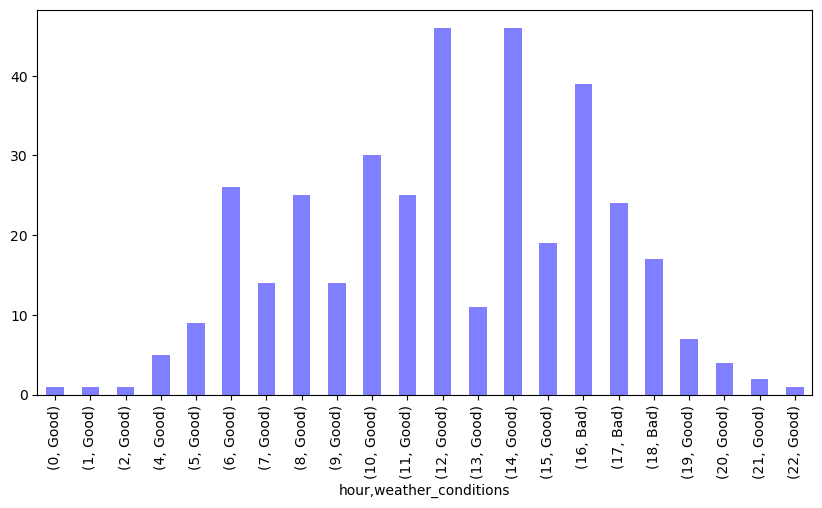

In [105]:
dia04 = df_7[df_7['dia']== 4]
dia04.groupby(['hour','weather_conditions'])['number_condicao_tempo'].count().plot(kind='bar', color='blue', alpha=0.5, figsize=(10, 5));

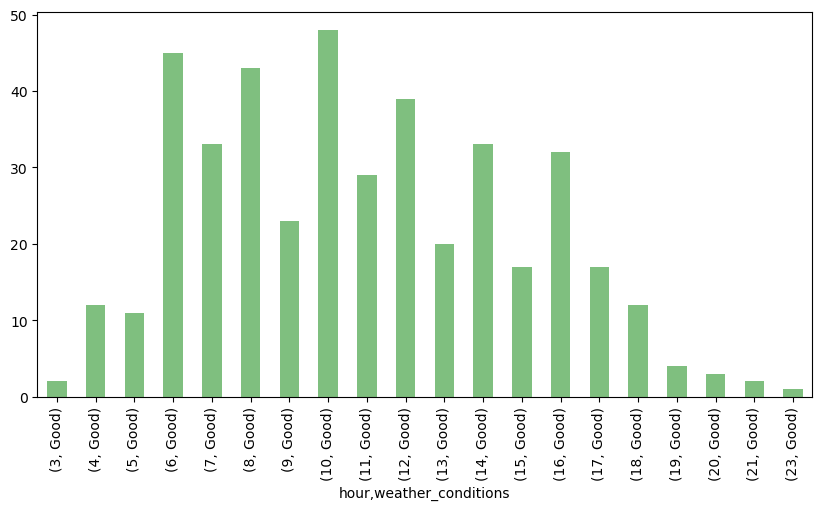

In [110]:
dia11 = df_7[df_7['dia']== 11]
dia11.groupby(['hour','weather_conditions'])['number_condicao_tempo'].count().plot(kind='bar', color='green', alpha=0.5, figsize=(10,5));

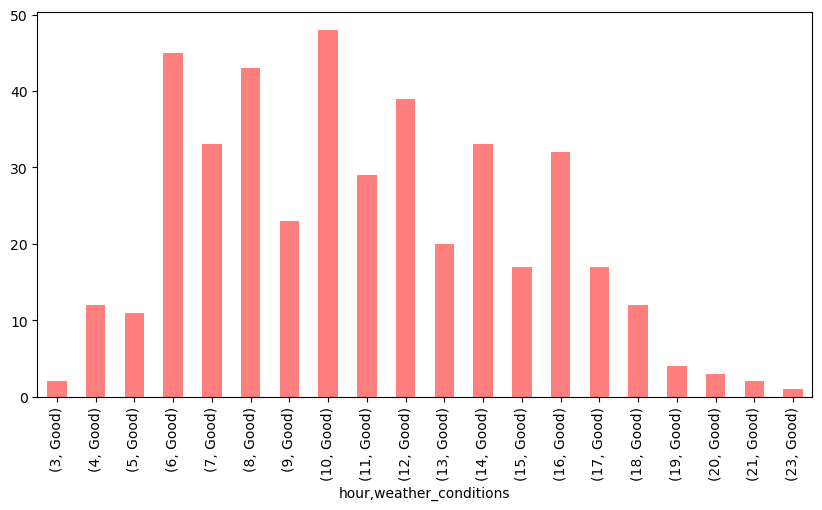

In [111]:
dia18 = df_7[df_7['dia'] == 11]
dia18.groupby(['hour','weather_conditions'])['number_condicao_tempo'].count().plot(kind='bar', color='red', alpha=0.5,figsize=(10,5));

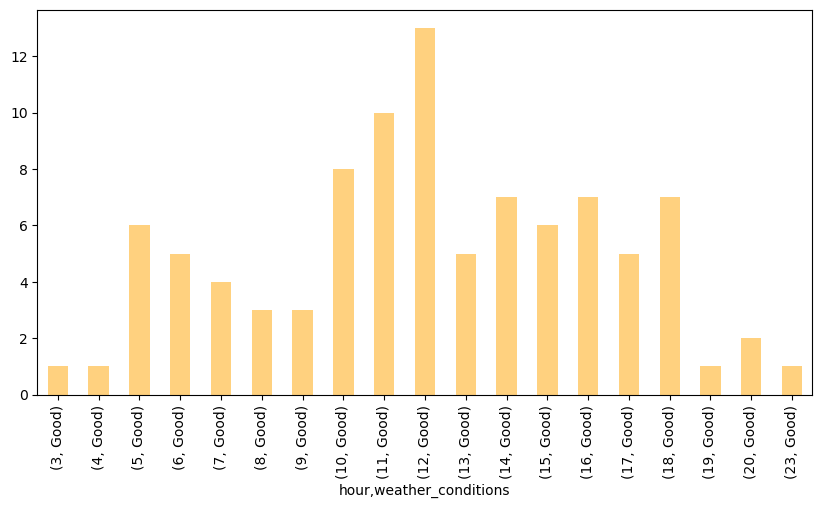

In [112]:
dia25 = df_7[df_7['dia']== 25]
dia25.groupby(['hour','weather_conditions'])['number_condicao_tempo'].count().plot(kind='bar', color='orange', alpha=0.5, figsize=(10,5));

Resumidamente, ao analisar os gráficos de barras que representam as condições climáticas por hora, podemos observar que nos dias 11 e 25, em todos os horários, as condições meteorológicas estavam boas. Isso indica que o clima não interferiu nas viagens realizadas pelos passageiros durante esses dias.

Por outro lado, nos dias 4 e 18, algumas horas foram afetadas por condições climáticas desfavoráveis para viagens de táxi. No entanto, o dia 4 se destaca por apresentar um maior número de horas com condições ruins para a realização das viagens de táxi.

Essas informações destacam a importância de considerar as condições climáticas ao analisar a demanda por serviços de táxi. Dias com condições climáticas adversas podem impactar a demanda e a disponibilidade de táxis, afetando a preferência dos passageiros em utilizar esse meio de transporte.



In [120]:
a  = df_7.query('dia == 4')
b  = df_7.query('dia == 18')
df_Bad_Day = [a,b]
df_Bad_Day = pd.concat(df_Bad_Day)
df_Bad_Day['duration_minutos'].mean()
print('A média de tempo em viagens na condição do tempo bom foi de:', round(df_Bad_Day['duration_minutos'].mean(),2),'minutos')
#-----------------------#----------------------#-------------------#
c  = df_7.query('dia == 11')
d  = df_7.query('dia == 25')
df_Good_Day = [c,d]
df_Good_Day = pd.concat(df_Good_Day)
df_Good_Day['duration_minutos'].mean()
print('A média de tempo em viagens na condição do tempo bom foi de:', round(df_Good_Day['duration_minutos'].mean(),2),'minutos')


A média de tempo em viagens na condição do tempo bom foi de: 26.99 minutos
A média de tempo em viagens na condição do tempo bom foi de: 20.82 minutos


In [121]:
# realizando teste de hipótese
sample_1 = df_Bad_Day['number_condicao_tempo'][df_Bad_Day['number_condicao_tempo'].notna()].tolist()
sample_2 = df_Good_Day['number_condicao_tempo'][df_Good_Day['number_condicao_tempo'].notna()].tolist()
alpha = 0.05
stat, p_value = st.levene(sample_1, sample_2)
result_levene = p_value

if result_levene < alpha:
    print('Rejeitamos H0, variâncias são diferentes, equal_var = Falso para o teste')
else:
    print('Não rejeitamos H0, variancias não são diferentes, equal_var = Verdadeiro para o teste')

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_2]]


print('Amostra de variâncias:', var_sample)

Rejeitamos H0, variâncias são diferentes, equal_var = Falso para o teste
Amostra de variâncias: [0.22118649175321933, 0.0]


In [129]:
alpha = 0.05  # nível crítico de significância estatística

results = st.ttest_ind(
    df_Bad_Day['number_condicao_tempo'], df_Good_Day['number_condicao_tempo'], equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 2.8588845149915184e-49
Nós rejeitamos a hipótese nula


Ao realizar o teste de Levene nas duas amostras das avaliações tempo de viagem para os sabados tempo ruim e sabados tempo bom, rejeitamos a hipótese nula, pois as variâncias são diferentes. No entanto, ao examinarmos as médias, rejeitamos a hipótese nula, o que indica que, para esse teste, as amostras possuem médias diferentes. Além disso, ao observarmos os valores relacionados às médias, percebemos que elas são, de fato, diferentes

# Conclusão Geral

Nossa conclusão, com base no estudo de caso analisando fatores como as condições meteorológicas aos sábados, é que o clima tem um impacto direto na demanda dos passageiros por serviços de táxi. Verificamos que, nos dias em que as condições climáticas são ruins, as médias de viagens são maiores em comparação aos dias com clima bom. No entanto, percebemos que essa variação quantitativa no número de viagens não está relacionada às questões meteorológicas.

Isso significa que, mesmo quando o tempo está ruim, não há uma redução significativa no número de viagens que deixam de ser realizadas devido a essa condição. Apenas a variação no tempo é afetada, mas a quantidade de viagens em si não é influenciada pelas condições meteorológicas.

Essa constatação indica que outros fatores, como a necessidade de deslocamento dos passageiros ou a disponibilidade de transporte alternativo, podem ter um peso maior na decisão de utilizar o serviço de táxi do que as condições climáticas em si.

In [8]:
df_1.to_csv('moved_project_sql_result_01_clean.csv', index=False)
df_4.to_csv('moved_project_sql_result_04_clean.csv', index=False)
df_7.to_csv('moved_project_sql_result_07_clean.csv', index=False)